# Autocorrelation and Partial Autocorrelation of BTC and ETH daily returns - [for explanation read here](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline


## BTC Autocorrelation

In [12]:
# Read in BTC prices
btc_prices = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/crypto-analysis/resources/BTC-USD.csv', usecols=['Date','Adj Close'], parse_dates=True)
btc_prices = btc_prices.set_index('Date')
btc_prices['daily_return'] = btc_prices['Adj Close'].pct_change()
btc_prices = btc_prices.dropna()
btc_prices.tail()

,Adj Close,daily_return
Date,,
2022-01-22,35030.250000,-0.039143
2022-01-23,36276.804688,0.035585
2022-01-24,36654.328125,0.010407
2022-01-25,36954.003906,0.008176
2022-01-26,36852.121094,-0.002757


In [3]:
# Calculate lagged return
btc_prices['lag_return'] = btc_prices['daily_return'].shift()
btc_prices['return_diff'] = btc_prices['daily_return'].diff()
btc_prices.tail()

,Adj Close,daily_return,lag_return,return_diff
Date,,,,
2014-09-18,424.440002,-0.071926,NaN,NaN
2014-09-19,394.795990,-0.069843,-0.071926,0.002083
2014-09-20,408.903992,0.035735,-0.069843,0.105578
2014-09-21,398.821014,-0.024659,0.035735,-0.060393
2014-09-22,402.152008,0.008352,-0.024659,0.033011


Text(0.5, 1.0, 'BTC Daily vs Lagged Return')

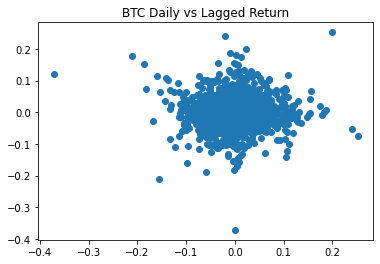

In [4]:
# Scatter plot of lagged return vs daily_return
x = btc_prices['lag_return']
y = btc_prices['daily_return']
plt.scatter(x, y)
plt.title('BTC Daily vs Lagged Return')

<AxesSubplot:title={'center':'30-day returns'}, xlabel='Date', ylabel='daily return'>

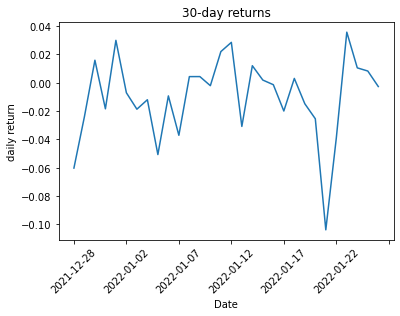

In [5]:
# Plot of last 30 days of daily return
btc_prices.daily_return[-30:].plot(title='30-day returns', rot=45, ylabel='daily return')

In [6]:
# Autocorrelation lag 1
btc_prices['daily_return'].autocorr(lag=1)

-0.01955352942802737

In [7]:
# Autocorrelation lag 30
btc_prices['daily_return'].autocorr(lag=30)

0.00957512153954806

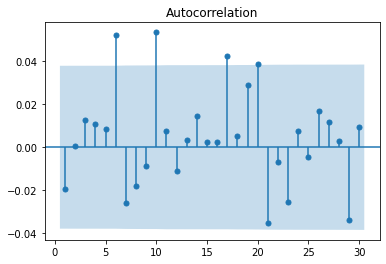

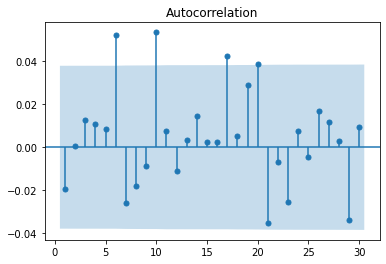

In [8]:
# Plot autocorrelation at different lags
plot_acf(btc_prices['daily_return'], lags=30, zero = False)

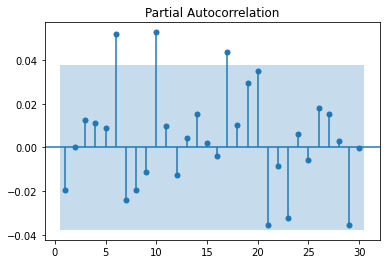

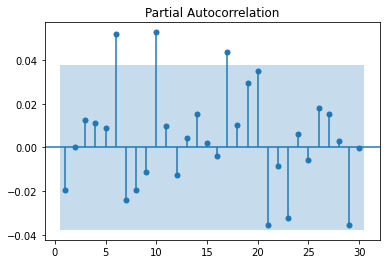

In [9]:
# Plot partial autocorrelation
sm.graphics.tsaplots.plot_pacf(btc_prices['daily_return'], lags=30, zero=False)

## ETH Autocorrelation

In [11]:
# Read in ETH prices
eth_prices = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/crypto-analysis/resources/ETH-USD.csv', usecols=['Date','Adj Close'], parse_dates=True)
eth_prices = eth_prices.set_index('Date')
eth_prices['daily_return'] = eth_prices['Adj Close'].pct_change()
eth_prices = eth_prices.dropna()
eth_prices.tail()

,Adj Close,daily_return
Date,,
2022-01-22,2405.181152,-0.059716
2022-01-23,2535.039063,0.053991
2022-01-24,2440.352295,-0.037351
2022-01-25,2455.935059,0.006385
2022-01-26,2468.030273,0.004925


In [16]:
# Calculate lagged return
eth_prices['lag_return'] = eth_prices['daily_return'].shift()
eth_prices['return_diff'] = eth_prices['daily_return'].diff()
eth_prices.tail()

,Adj Close,daily_return,lag_return,return_diff
Date,,,,
2022-01-22,2405.181152,-0.059716,-0.147674,0.087958
2022-01-23,2535.039063,0.053991,-0.059716,0.113707
2022-01-24,2440.352295,-0.037351,0.053991,-0.091342
2022-01-25,2455.935059,0.006385,-0.037351,0.043737
2022-01-26,2468.030273,0.004925,0.006385,-0.001461


Text(0.5, 1.0, 'ETH Daily vs Lagged Return')

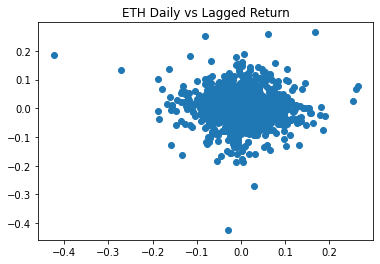

In [17]:
# Scatter plot of lagged return vs daily_return
x = eth_prices['lag_return']
y = eth_prices['daily_return']
plt.scatter(x, y)
plt.title('ETH Daily vs Lagged Return')

In [18]:
# Autocorrelation lag 1
eth_prices['daily_return'].autocorr(lag=1)

-0.04326831986031416

In [20]:
# Autocorrelation lag 30
eth_prices['daily_return'].autocorr(lag=30)

0.02452844127292927

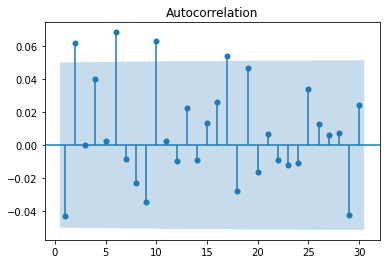

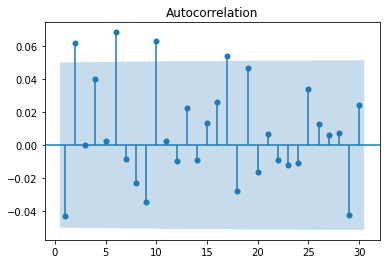

In [24]:
# Plot autocorrelation at different lags
plot_acf(eth_prices['daily_return'], lags=30, zero = False)

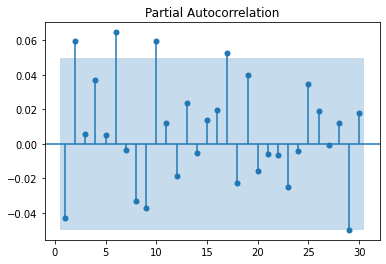

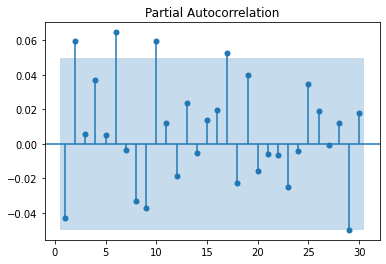

In [23]:
# Plot partial autocorrelation
sm.graphics.tsaplots.plot_pacf(eth_prices['daily_return'], lags=30, zero=False)